# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

__Getting Started: Read The Data,  First intuition, and import main libs__

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
%matplotlib inline

In [11]:
df = pd.read_csv('./data/employee_churn_data.csv')

In [3]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [5]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [6]:
df.duplicated().sum()

0

> _Data is Clean_

In [7]:
# ---> Left Ratio
df.left.value_counts() / df.shape[0]

no     0.708176
yes    0.291824
Name: left, dtype: float64

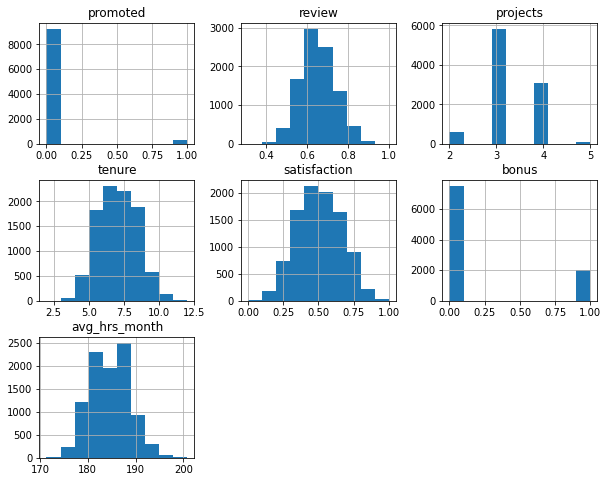

In [8]:
df.hist(figsize=(10, 8))
plt.show()

___Bonus__ and __Promoted__ columns are very __Skewed Shape___

> # EDA: Let's Explore it 

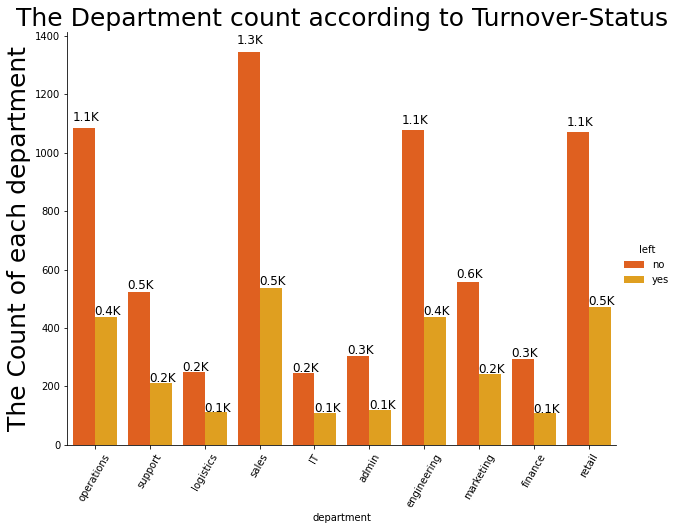

In [9]:
p = sns.catplot(data=df, kind="count", x="department", hue="left", palette='autumn',  height = 6.27, aspect = 9.7/7.27)
plt.ylabel("The Count of each department",fontsize=25)
plt.title("The Department count according to Turnover-Status", fontsize=25)
plt.xticks(rotation=60)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

__Q: Which department has the highest employee turnover? Which one has the lowest?__ \
__Answer: The `Sales` Has The Highest Employee Turnover, and `IT` Has The Lowest__

In [10]:
dept_counts = df.groupby("department")["department"].count().values

In [11]:
dept_left_counts = df[df.left == 'yes'].groupby("department")["department"].count().values

In [12]:
dept_left_ratio = dept_left_counts / dept_counts 
labels = df.groupby("department")["department"].count().index

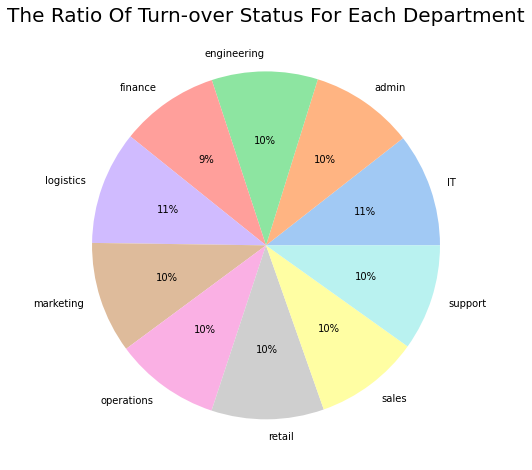

In [13]:
colors = sns.color_palette('pastel')[0:10]
#create pie chart
plt.figure(figsize=(10, 8))
plt.pie(dept_left_ratio, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("The Ratio Of Turn-over Status For Each Department", fontsize=20)
plt.show()

__ALL The Departments almost have `The Same Turnover-Ratio`__ 

> __Investigate which variables seem to be better predictors of employee departure__

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


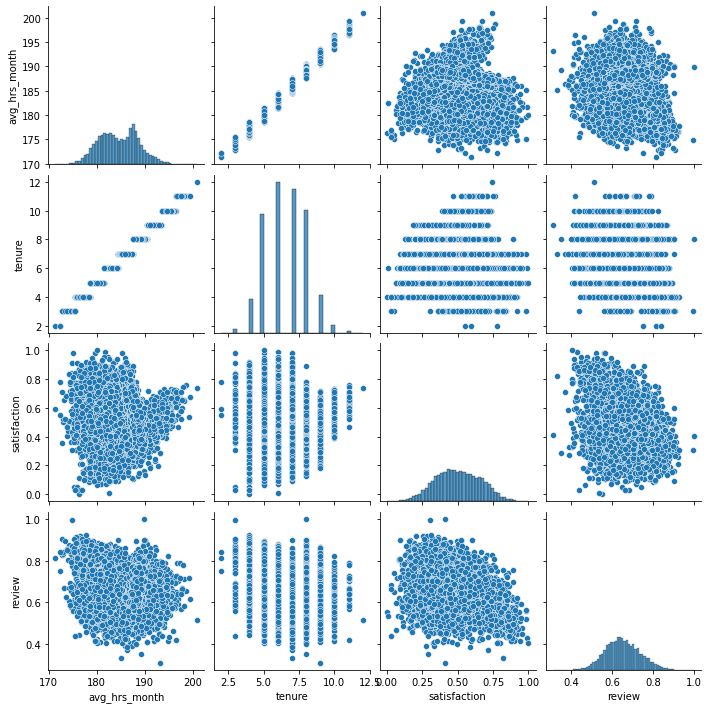

In [15]:
sns.pairplot(df[['avg_hrs_month', 'tenure', 'satisfaction', 'review']])
plt.show()

__High positive correlation between `avg_hrs_month` and `tenure`__

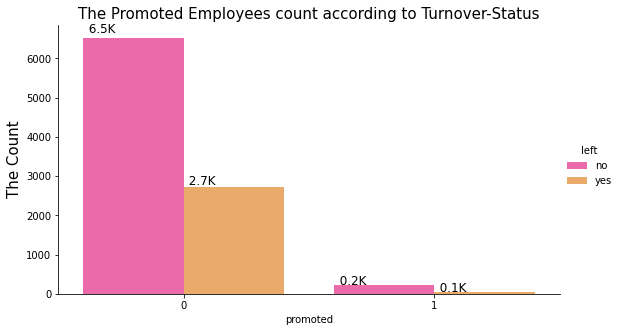

In [16]:
p = sns.catplot(data=df, kind="count", x="promoted", hue="left", palette='spring',  height = 4.27, aspect = 7.7/4.27)
plt.ylabel("The Count",fontsize=15)
plt.title("The Promoted Employees count according to Turnover-Status", fontsize=15)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '  {0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

__Most of the people who `left are not-promoted`,  _but_ `half` of the people who `promoted` left too__

In [17]:
emp_prom_left = df[np.logical_and(df.promoted == 1, df.left == 'yes')]

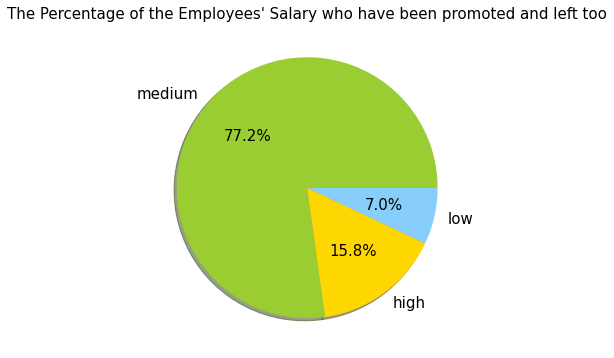

In [18]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "red", "lightblue", "yellow"]
emp_prom_left.salary.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), shadow=True, colors=colors, fontsize=15)
plt.title("The Percentage of the Employees' Salary who have been promoted and left too", fontsize=15)
plt.ylabel("")
plt.show()

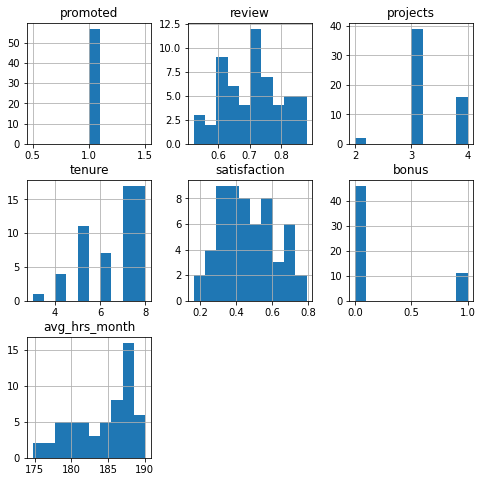

In [19]:
emp_prom_left.hist(figsize=(8,8))
plt.title("The Histogram for the Employees who have been promoted and left too")
plt.show()

__For Theese Employees:__
1. their `satisfaction rate` are almost fair(normaly) but not perfect.
2. most of them are `staying for +8 years` in the company
3. most of them `did not get bonus`

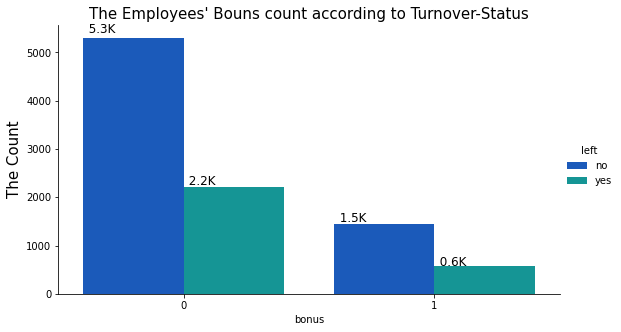

In [20]:
p = sns.catplot(data=df, kind="count", x="bonus", hue="left", palette='winter',  height = 4.27, aspect = 7.7/4.27)
plt.ylabel("The Count",fontsize=15)
plt.title("The Employees' Bouns count according to Turnover-Status", fontsize=15)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '  {0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

__Most of the people who left are `not-bonused`__

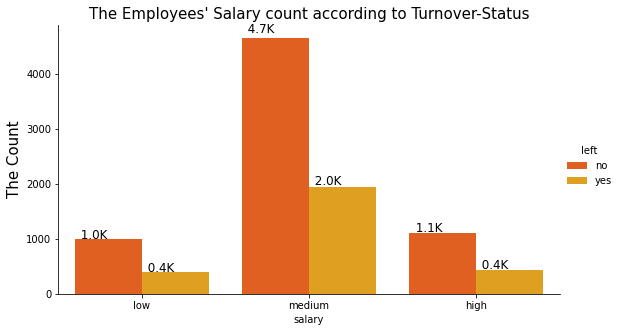

In [21]:
p = sns.catplot(data=df, kind="count", x="salary", hue="left", palette='autumn',  height = 4.27, aspect = 7.7/4.27)
plt.ylabel("The Count",fontsize=15)
plt.title("The Employees' Salary count according to Turnover-Status", fontsize=15)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '  {0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

__Most of the People who `left` get `meduim salary`__ 

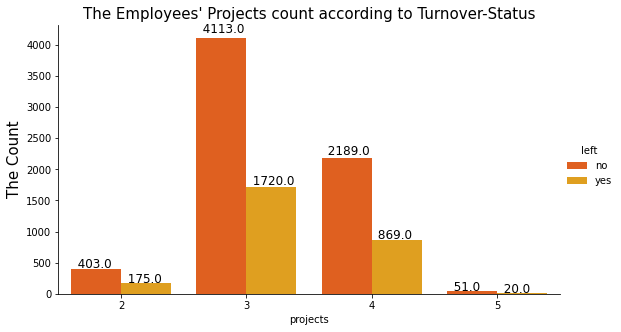

In [17]:
p = sns.catplot(data=df, kind="count", x="projects", hue="left", palette='autumn',  height = 4.27, aspect = 7.7/4.27)
plt.ylabel("The Count",fontsize=15)
plt.title("The Employees' Projects count according to Turnover-Status", fontsize=15)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '  {0:.1f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

__Most of the People who `left` work on `3, 4` `Project`__ 

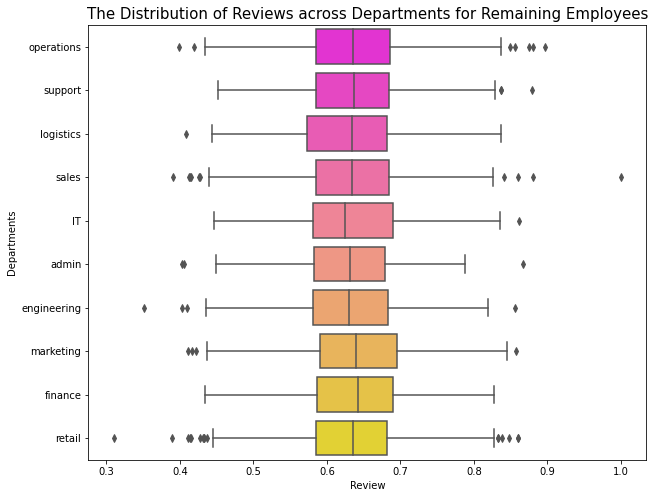

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[df.left=='no'], x="review", y="department", palette="spring")
plt.title("The Distribution of Reviews across Departments for Remaining Employees", fontsize=15)
plt.xlabel("Review", fontsize=10)
plt.ylabel("Departments", fontsize=10)
plt.show()

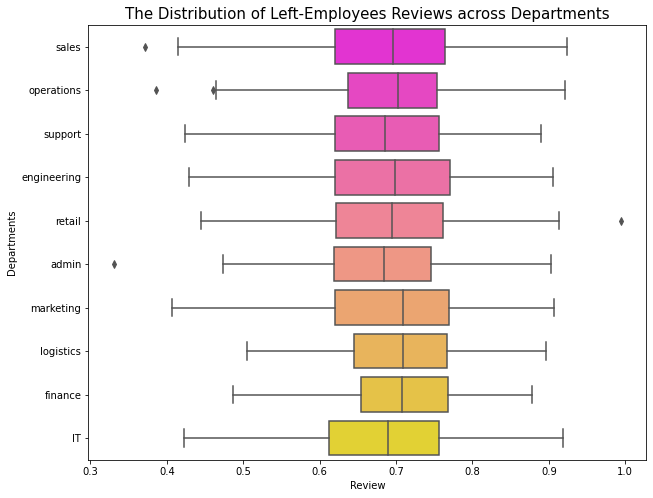

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[df.left=='yes'], x="review", y="department", palette="spring")
plt.title("The Distribution of Left-Employees Reviews across Departments", fontsize=15)
plt.xlabel("Review", fontsize=10)
plt.ylabel("Departments", fontsize=10)
plt.show()

__Employees Reviews who `left` are `not normally` distributed like Remaining ones__


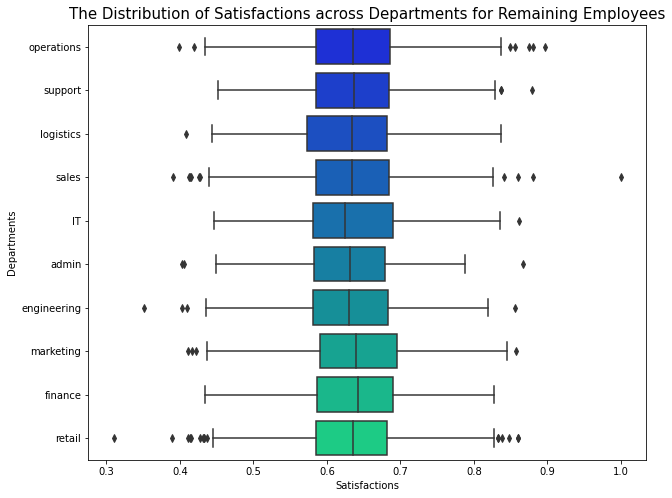

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[df.left=='no'], x="review", y="department", palette="winter")
plt.title("The Distribution of Satisfactions across Departments for Remaining Employees", fontsize=15)
plt.xlabel("Satisfactions", fontsize=10)
plt.ylabel("Departments", fontsize=10)
plt.show()

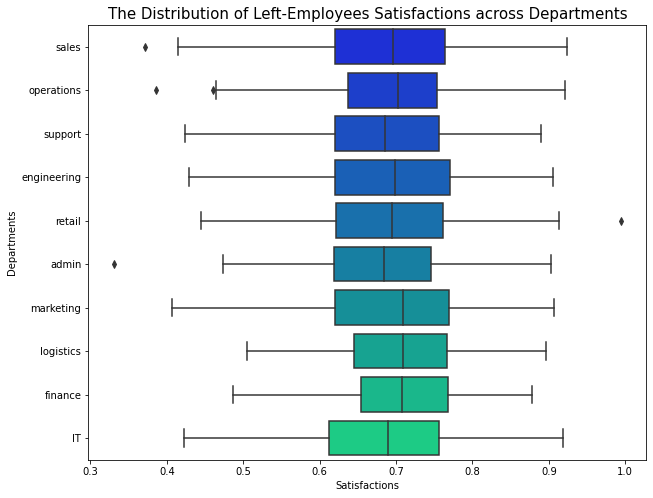

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[df.left=='yes'], x="review", y="department", palette="winter")
plt.title("The Distribution of Left-Employees Satisfactions across Departments", fontsize=15)
plt.xlabel("Satisfactions", fontsize=10)
plt.ylabel("Departments", fontsize=10)
plt.show()

__The `Satisfactions` scores have some outliers__


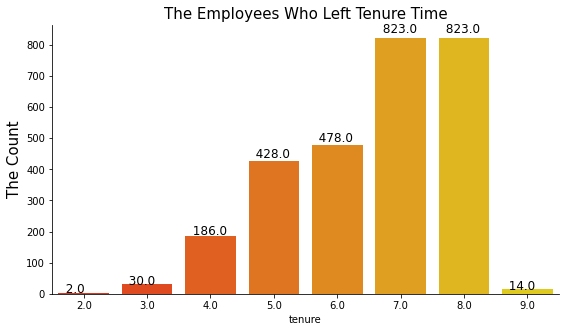

In [18]:
p = sns.catplot(data=df[df.left=='yes'], kind="count", x="tenure", palette='autumn',  height = 4.27, aspect = 7.7/4.27)
plt.ylabel("The Count",fontsize=15)
plt.title("The Employees Who Left Tenure Time", fontsize=15)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '  {0:.1f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

__Most of people who left stayed for 7+, 8+ years, so that's explain why they provide good satisfaction score__


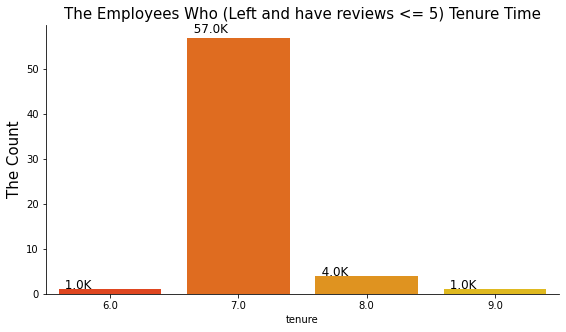

In [28]:
p = sns.catplot(data=df[np.logical_and(df.left == 'yes', df.review <= 0.5)], kind="count", x="tenure", palette='autumn',  height = 4.27, aspect = 7.7/4.27)
plt.ylabel("The Count",fontsize=15)
plt.title("The Employees Who (Left and have reviews <= 5) Tenure Time", fontsize=15)

ax = p.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '  {0:.1f}K'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.show()

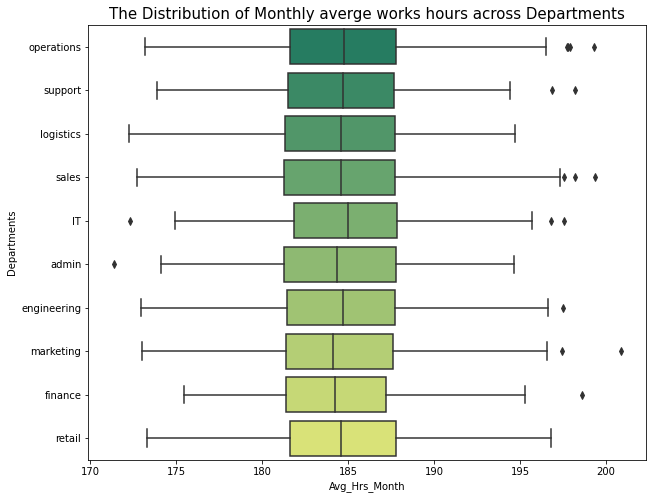

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="avg_hrs_month", y="department", palette="summer")
plt.title("The Distribution of Monthly averge works hours across Departments", fontsize=15)
plt.xlabel("Avg_Hrs_Month", fontsize=10)
plt.ylabel("Departments", fontsize=10)
plt.show()


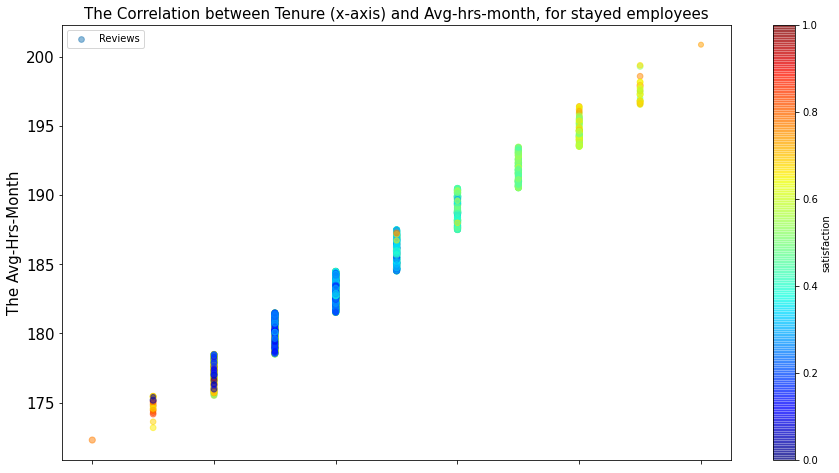

In [14]:
df[df.left=='no'].plot(kind='scatter', x='tenure', y='avg_hrs_month', alpha=.5, cmap=plt.get_cmap("jet"),
           s=df[df.left=='no']['review']*50, c='satisfaction', label='Reviews', figsize=(15, 8), fontsize=15, colorbar=True)
plt.title("The Correlation between Tenure (x-axis) and Avg-hrs-month, for stayed employees", fontsize=15)
plt.ylabel("The Avg-Hrs-Month", fontsize=15)
plt.legend()
plt.show()

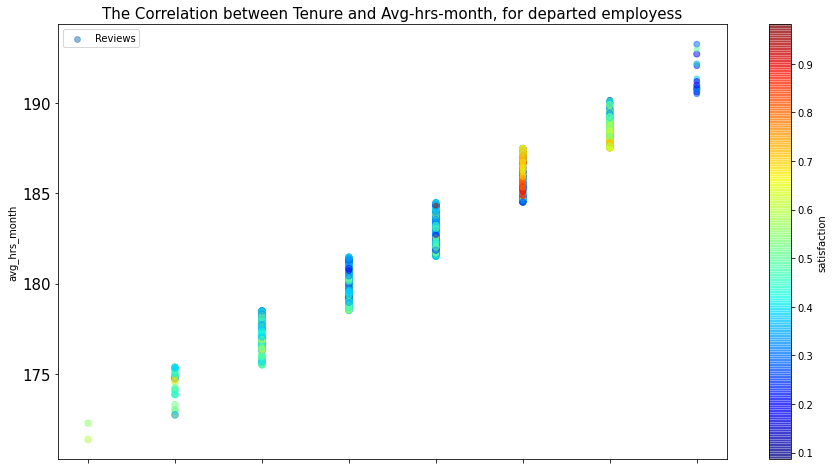

In [15]:
df[df.left=='yes'].plot(kind='scatter', x='tenure', y='avg_hrs_month', alpha=.5, cmap=plt.get_cmap("jet"),
           s=df[df.left=='yes']['review']*50, c='satisfaction', label='Reviews', figsize=(15, 8), fontsize=15, colorbar=True)
plt.title("The Correlation between Tenure and Avg-hrs-month, for departed employess", fontsize=15)
plt.legend()
plt.show()

> # Modelling: Let's predict if the employee will left or not

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encode_columns = ["department", "salary", "left"]
encoder = LabelEncoder()
for column in encode_columns:
    df[column] = encoder.fit_transform(df[column])

In [34]:
# no  --> 0
# yes --> 1
encoder.classes_

array(['no', 'yes'], dtype=object)

In [35]:
df.head(1)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,6,0,0.577569,3,1,5.0,0.626759,0,180.86607,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop("left", axis=1).values
y = df.left.values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

__`XGBClassifier`__

In [57]:
from xgboost import XGBClassifier

In [58]:
model = XGBClassifier()
model.fit(X_train, y_train)

[13:58:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
model.score(X_test, y_test)

0.8558700209643606

In [62]:
predY = model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, predY, rownames=['Actual'], colnames=['Predicted'], margins = True)
confusion_matrix

Predicted,0,1,All
Actual,,,
0,1218,112,1330
1,163,415,578
All,1381,527,1908


__Im-Balanced Data Problem__

In [63]:
no_df = df[df.left==0]
yes_df = df[df.left==1]

In [64]:
no_df.shape

(6756, 10)

In [65]:
yes_df.shape

(2784, 10)

In [66]:
no_balanced_df = no_df.sample(yes_df.shape[0], random_state=42)

(2784, 10)

In [67]:
balanced_df = pd.concat([no_balanced_df, yes_df])
balanced_df.left.value_counts()

0    2784
1    2784
Name: left, dtype: int64

In [68]:
X = balanced_df.drop("left", axis=1).values
y = balanced_df.left.values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [70]:
model = XGBClassifier()
model.fit(X_train, y_train)
predY = model.predict(X_test)

[13:58:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       566
           1       0.83      0.85      0.84       548

    accuracy                           0.84      1114
   macro avg       0.84      0.84      0.84      1114
weighted avg       0.84      0.84      0.84      1114

